# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas-docs.github.io/pandas-docs-travis/io.html#json
+ data source: http://jsonstudio.com/resources/
****

In [56]:
#%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\pycon-pandas-tutorial-master
%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section5.2_item 4_JSON_Based_Data_Exercise\data_wrangling_json
import warnings
warnings.filterwarnings('ignore')

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\Section5.2_item 4_JSON_Based_Data_Exercise\data_wrangling_json


In [57]:
import pandas as pd
import numpy as np
from collections import defaultdict

## imports for Python, Pandas

In [58]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas-docs.github.io/pandas-docs-travis/io.html#normalization

In [59]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [60]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [61]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [62]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [63]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [68]:
#Prepare for Exercises: load json as Pandas dataframe
world_bank_projects_df = pd.read_json('data/world_bank_projects.json')
world_bank_projects_df.head(1)

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...


In [69]:
#Exercise 1 - Find the 10 countries with the most projects
w = world_bank_projects_df
w = w.loc[:,['countryshortname','_id']].groupby('countryshortname').size().sort_values(ascending=False)
w.head(10)

countryshortname
Indonesia             19
China                 19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
dtype: int64

(0, 20)

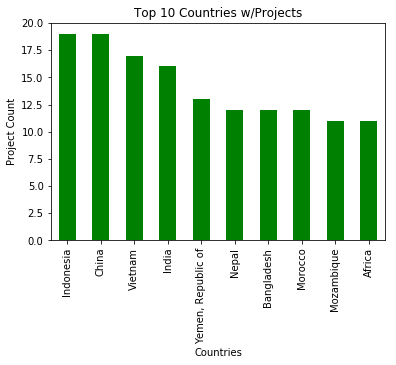

In [70]:
#Exercise 1 - Plot of 10 countries with most projects
p = w.head(10)

ax = p.plot(kind='bar', title='Top 10 Countries w/Projects',color='green')
ax.set_xlabel("Countries")
ax.set_ylabel("Project Count")
ax.set_ylim(0,20)


In [71]:
#Exercise 2 - Find the top 10 major project themes

#Create a series of only the mjtheme column
pt = world_bank_projects_df
pt = pt.loc[:,'mjtheme_namecode']

#Loop thru the dictionary entries in each row and create a list (ptl) of all the themes
ptl = []
for p, pentry in enumerate(pt):
    for q,qentry in enumerate(pentry):
        ptl.append(qentry['code'] + ' ' + qentry['name'])

#Convert the list to a dataframe and count the themes
ptl_df = pd.DataFrame(ptl)
ptl_df.columns = ['theme']
ptl_df = ptl_df.loc[:,['theme','_id']].groupby('theme').size().sort_values(ascending=False)
ptl_df.head(10)

theme
11 Environment and natural resources management    223
10 Rural development                               202
8 Human development                                197
2 Public sector governance                         184
6 Social protection and risk management            158
4 Financial and private sector development         130
7 Social dev/gender/inclusion                      119
5 Trade and integration                             72
9 Urban development                                 47
1 Economic management                               33
dtype: int64

In [116]:
#Exercise 3: Correct entries in the mjtheme_namecode column that are missing a value

#Load the json data and convert to a dataframe using json normalization
with open('data/world_bank_projects.json') as json_file:
    json_data = json.load(json_file)
    
df = json_normalize(json_data,'mjtheme_namecode',['_id']).sort_values('code')

#Replace all the "name" column values that are blank with NaN and use ffill() to populate the missing names
df_name = df.name.replace('', np.NaN)
df_name = df_name.fillna(method='ffill')
df['name'] = df_name
df

,code,name,_id
458,1,Economic management,{'$oid': '52b213b38594d8a2be17c81f'}
1235,1,Economic management,{'$oid': '52b213b38594d8a2be17c91a'}
1230,1,Economic management,{'$oid': '52b213b38594d8a2be17c919'}
1229,1,Economic management,{'$oid': '52b213b38594d8a2be17c919'}
1218,1,Economic management,{'$oid': '52b213b38594d8a2be17c915'}
900,1,Economic management,{'$oid': '52b213b38594d8a2be17c8ad'}
648,1,Economic management,{'$oid': '52b213b38594d8a2be17c85c'}
647,1,Economic management,{'$oid': '52b213b38594d8a2be17c85c'}
1078,1,Economic management,{'$oid': '52b213b38594d8a2be17c8eb'}
1206,1,Economic management,{'$oid': '52b213b38594d8a2be17c911'}
